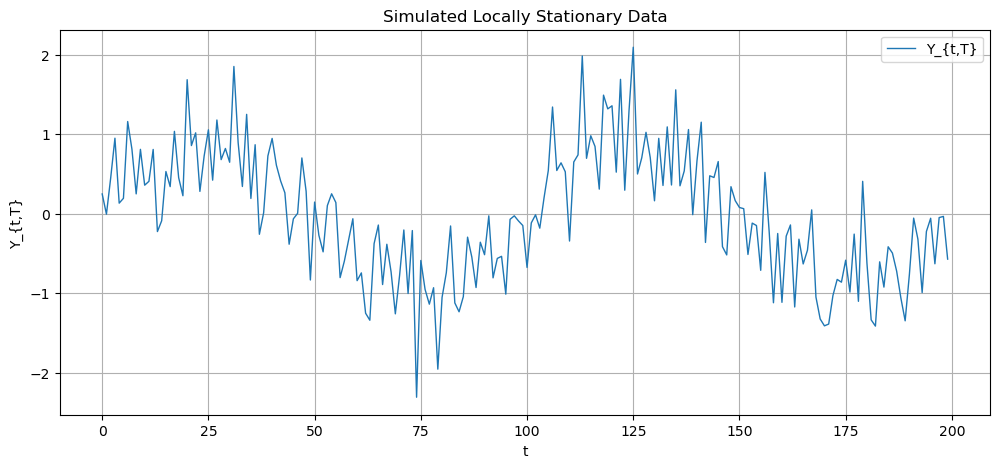

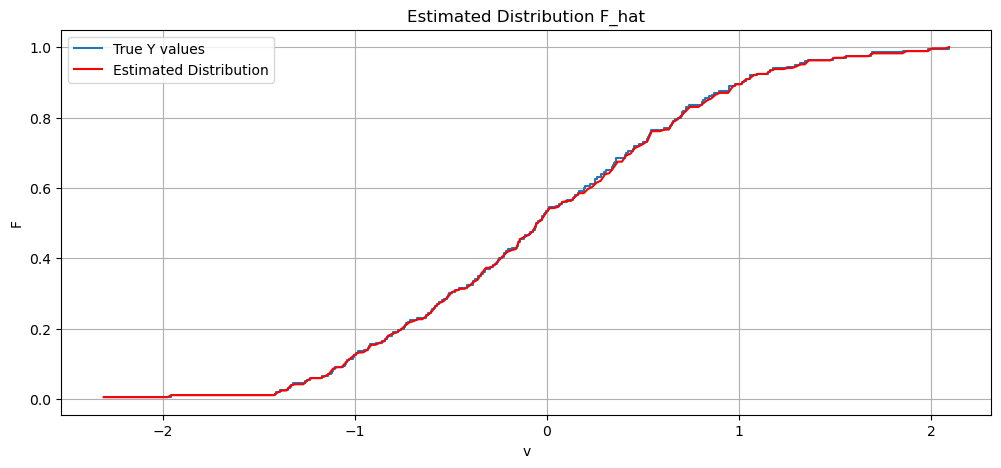

0.10256526345262845
0.0005128263172631423


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Parameters
T = 200  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Y_{t,T}", linewidth=1)
plt.title("Simulated Locally Stationary Data")
plt.xlabel("t")
plt.ylabel("Y_{t,T}")
plt.legend()
plt.grid(True)
plt.show()

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

# Define the weight function
def omega(t, u, x, h):
    numerator = K_h1(u - t / T, h) * np.prod(K_h2(x - X[t-1], h))
    denominator = np.sum([K_h1(u - s / T, h) * np.prod(K_h2(x - X[s-1], h)) for s in range(1, T+1)])
    return numerator / denominator

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h = 0.5

weights = [omega(t, u_test, x_test, h) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

def ecdf(u, x, v, h):
    weights = np.array([omega(t, u, x, h) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5, h)
#print(F)
F_values = [ecdf(u_test, x_test, v, h) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, cdf1, where='post', label='True Y values')
plt.plot(v_values, F_values, label="Estimated Distribution", color='red')
plt.title("Estimated Distribution F_hat")
plt.xlabel("v")
plt.ylabel("F")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
distribution1 = cdf1
distribution2 = F_values

# Compute the 1-Wasserstein distance
W1 = wasserstein_distance(distribution1, distribution2)
mean_W1 = W1/T
print(W1)
print(mean_W1)


In [8]:
from scipy.stats import wasserstein_distance

# Define two probability distributions (as arrays)
distribution1 = cdf1
distribution2 = F_values

# Compute the 1-Wasserstein distance
W1 = wasserstein_distance(distribution1, distribution2)
Mean_W1 = W1/T

print("1-Wasserstein distance: ",W1)
print("Expected 1-Wasserstein distance: ",Mean_W1)

1-Wasserstein distance:  0.10256526345262845
Expected 1-Wasserstein distance:  0.0005128263172631423
